# Predict tips

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("taxi_cleaned.csv")
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,fare,tips,tolls,extras,trip_total,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,day_name,is_weekend,day_of_year,hour,weekday
0,d3a5f1452b4a1db2a547e7a0aabfe28d67c62b0e40155f...,2015-10-30 02:15:00,2015-10-30 02:45:00+00:00,1500.0,18.3,14.0,37.25,7.65,0.0,1.0,45.90,Dispatch Taxi Affiliation,41.968069,-87.721559,NaN,NaN,Friday,False,303,2,4
1,d3a5f1452b4a1db2a547e7a0aabfe28d67c62b0e40155f...,2015-10-28 05:00:00,2015-10-28 05:45:00+00:00,3120.0,35.7,14.0,68.45,0.00,6.5,25.0,99.95,Dispatch Taxi Affiliation,41.968069,-87.721559,NaN,NaN,Wednesday,False,301,5,2
2,690e6f6c8d77a5d90d150573dc42de392e58ba1e2ca4ae...,2015-10-20 18:30:00,2015-10-20 19:00:00+00:00,1500.0,7.5,14.0,19.65,5.00,0.0,5.0,29.65,Dispatch Taxi Affiliation,41.968069,-87.721559,NaN,NaN,Tuesday,False,293,18,1
3,ee6216cc0f10e2d9b4a4e875fa910a413dde12495038a5...,2016-01-28 07:00:00,2016-01-28 08:15:00+00:00,4680.0,44.1,14.0,105.75,15.00,0.0,74.5,195.25,Dispatch Taxi Affiliation,41.968069,-87.721559,NaN,NaN,Thursday,False,28,7,3
4,477e2191cd2213e2db9413d810936b2f24a73c8e527059...,2015-10-20 08:45:00,2015-10-20 09:15:00+00:00,1500.0,5.1,14.0,15.85,3.15,0.0,0.0,19.00,Taxi Affiliation Services,41.968069,-87.721559,NaN,NaN,Tuesday,False,293,8,1


# One hot encode categorial variables

In [3]:
df.pickup_community_area = df.pickup_community_area.astype(str)  # float values could not be converted with get_dummies
one_hot = pd.get_dummies(df[['company', 'pickup_community_area', 'day_name']])
one_hot.head()

,company_American United,company_Blue Diamond,company_Blue Ribbon Taxi Association Inc.,company_Checker Taxi,company_Chicago Elite Cab Corp.,company_Chicago Elite Cab Corp. (Chicago Carriag,company_Choice Taxi Association,company_Dispatch Taxi Affiliation,company_KOAM Taxi Association,company_Northwest Management LLC,company_Park Ridge Taxi and Livery,company_T.A.S. - Payment Only,company_Taxi Affiliation Services,company_Top Cab Affiliation,company_Yellow Cab,company_other,pickup_community_area_0.0,pickup_community_area_1.0,pickup_community_area_14.0,pickup_community_area_16.0,pickup_community_area_2.0,pickup_community_area_21.0,pickup_community_area_22.0,pickup_community_area_24.0,pickup_community_area_28.0,pickup_community_area_3.0,pickup_community_area_32.0,pickup_community_area_33.0,pickup_community_area_4.0,pickup_community_area_41.0,pickup_community_area_5.0,pickup_community_area_56.0,pickup_community_area_6.0,pickup_community_area_7.0,pickup_community_area_76.0,pickup_community_area_77.0,pickup_community_area_8.0,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [4]:
df = df.merge(one_hot, left_index=True, right_index=True)
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,fare,tips,tolls,extras,trip_total,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,day_name,is_weekend,day_of_year,hour,weekday,company_American United,company_Blue Diamond,company_Blue Ribbon Taxi Association Inc.,company_Checker Taxi,company_Chicago Elite Cab Corp.,company_Chicago Elite Cab Corp. (Chicago Carriag,company_Choice Taxi Association,company_Dispatch Taxi Affiliation,company_KOAM Taxi Association,company_Northwest Management LLC,company_Park Ridge Taxi and Livery,company_T.A.S. - Payment Only,company_Taxi Affiliation Services,company_Top Cab Affiliation,company_Yellow Cab,company_other,pickup_community_area_0.0,pickup_community_area_1.0,pickup_community_area_14.0,pickup_community_area_16.0,pickup_community_area_2.0,pickup_community_area_21.0,pickup_community_area_22.0,pickup_community_area_24.0,pickup_community_area_28.0,pickup_community_area_3.0,pickup_community_area_32.0,pickup_community_area_33.0,pickup_community_area_4.0,pickup_community_area_41.0,pickup_community_area_5.0,pickup_community_area_56.0,pickup_community_area_6.0,pickup_community_area_7.0,pickup_community_area_76.0,pickup_community_area_77.0,pickup_community_area_8.0,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,d3a5f1452b4a1db2a547e7a0aabfe28d67c62b0e40155f...,2015-10-30 02:15:00,2015-10-30 02:45:00+00:00,1500.0,18.3,14.0,37.25,7.65,0.0,1.0,45.90,Dispatch Taxi Affiliation,41.968069,-87.721559,NaN,NaN,Friday,False,303,2,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,d3a5f1452b4a1db2a547e7a0aabfe28d67c62b0e40155f...,2015-10-28 05:00:00,2015-10-28 05:45:00+00:00,3120.0,35.7,14.0,68.45,0.00,6.5,25.0,99.95,Dispatch Taxi Affiliation,41.968069,-87.721559,NaN,NaN,Wednesday,False,301,5,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,690e6f6c8d77a5d90d150573dc42de392e58ba1e2ca4ae...,2015-10-20 18:30:00,2015-10-20 19:00:00+00:00,1500.0,7.5,14.0,19.65,5.00,0.0,5.0,29.65,Dispatch Taxi Affiliation,41.968069,-87.721559,NaN,NaN,Tuesday,False,293,18,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,ee6216cc0f10e2d9b4a4e875fa910a413dde12495038a5...,2016-01-28 07:00:00,2016-01-28 08:15:00+00:00,4680.0,44.1,14.0,105.75,15.00,0.0,74.5,195.25,Dispatch Taxi Affiliation,41.968069,-87.721559,NaN,NaN,Thursday,False,28,7,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,477e2191cd2213e2db9413d810936b2f24a73c8e527059...,2015-10-20 08:45:00,2015-10-20 09:15:00+00:00,1500.0,5.1,14.0,15.85,3.15,0.0,0.0,19.00,Taxi Affiliation Services,41.968069,-87.721559,NaN,NaN,Tuesday,False,293,8,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Create training data

In [5]:
df = df[~df.trip_seconds.isna() & ~df.trip_miles.isna()]
df.shape

(236137, 65)

In [6]:
df.trip_start_timestamp = df.trip_start_timestamp.astype("datetime64")

In [7]:
# Sort values to make validation split as correct as possible
df.sort_values('trip_start_timestamp', inplace=True)

In [8]:
# Set the target to the percentage of tip to be fair with low cost trips
X, y = df.drop(columns=['tips']), df.tips/(df.trip_total - df.tips) 

In [9]:
# Drop not relevant columns
X.drop(columns=['taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
                'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
                'company', 'day_name', 'pickup_community_area', # These are already one hot encoded
                'trip_total' # This would be cheating to include
               ],
       inplace=True)

In [10]:
# Split train/valid sets
valid_size = .15
split_index = int((1-valid_size) * X.shape[0])
X_train, y_train, X_valid, y_valid = X[:split_index], y[:split_index], X[split_index:], y[split_index:]

X_train.shape, X_valid.shape

((200716, 53), (35421, 53))

# Prediction

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [12]:
rf = RandomForestRegressor(n_estimators=100, max_depth=5, max_leaf_nodes=20,
                           n_jobs=10, random_state=69)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=20,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=10,
           oob_score=False, random_state=69, verbose=0, warm_start=False)

In [13]:
preds = rf.predict(X_valid)
mean_squared_error(y_valid, preds)

4562.692266802235

That is huge error, check for the cause

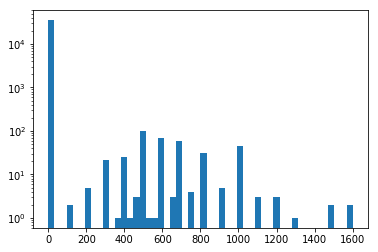

In [14]:
plt.yscale('log')
plt.hist(y_valid, bins=50);

In many case the tip is much bigger than the total cost of trip, remove these

In [15]:
(y >= 1).mean()

0.0042729432490461045

In [16]:
X, y = X[y<1], y[y<1]
split_index = int((1-valid_size) * X.shape[0])
X_train, y_train, X_valid, y_valid = X[:split_index], y[:split_index], X[split_index:], y[split_index:]

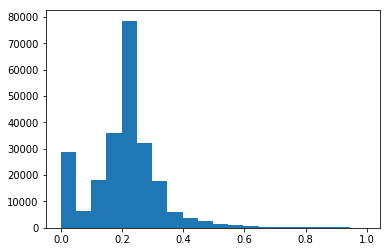

In [17]:
plt.hist(y, bins=20);

In [18]:
# Retrain model
rf.fit(X_train, y_train)
preds = rf.predict(X_valid)
mean_squared_error(y_valid, preds)

0.009236056808500915

That's much better result

# Hyperoptimisation

In [19]:
from hyperopt import fmin, tpe, hp, STATUS_OK

In [20]:
def objective_function(hyperparameters):   
    #Create a model with the hyperparameters
    temp_model = RandomForestRegressor(n_estimators=int(hyperparameters['n_estimators']),
                                       max_depth=int(hyperparameters['max_depth']),
                                       max_leaf_nodes=int(hyperparameters['max_leaf_nodes']),
                                       max_features = hyperparameters['max_features'],
                                       n_jobs=10, random_state=69)
    
    #Train the model
    temp_model.fit(X_train, y_train)
    
    #Evaluate the model
    preds = temp_model.predict(X_valid)
    loss = mean_squared_error(y_valid, preds)
    
    print(loss, hyperparameters)
    return {'loss': loss, 'params': hyperparameters, 'status': STATUS_OK}

In [21]:
space = {
            'n_estimators': hp.quniform('n_estimators', 20, 300, 1), 
            'max_depth': hp.quniform('max_depth', 3, 8, 1),
            'max_leaf_nodes': hp.quniform('max_leaf_nodes', 5, 25, 1),
            'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2'])
        }

best = fmin(fn=objective_function,
            space=space,
            algo=tpe.suggest,
            max_evals=20)

print(best)

0.009132448990154255 {'max_depth': 5.0, 'max_features': 'sqrt', 'max_leaf_nodes': 23.0, 'n_estimators': 111.0}
0.009404141768570875 {'max_depth': 4.0, 'max_features': 'auto', 'max_leaf_nodes': 10.0, 'n_estimators': 76.0}
0.009150949072539829 {'max_depth': 7.0, 'max_features': 'sqrt', 'max_leaf_nodes': 22.0, 'n_estimators': 203.0}
0.009226161345254958 {'max_depth': 7.0, 'max_features': 'auto', 'max_leaf_nodes': 13.0, 'n_estimators': 291.0}
0.009453594221885445 {'max_depth': 3.0, 'max_features': 'sqrt', 'max_leaf_nodes': 7.0, 'n_estimators': 294.0}
0.009245517646179247 {'max_depth': 5.0, 'max_features': 'auto', 'max_leaf_nodes': 21.0, 'n_estimators': 263.0}
0.009123784924850472 {'max_depth': 6.0, 'max_features': 'sqrt', 'max_leaf_nodes': 20.0, 'n_estimators': 45.0}
0.009183293193930771 {'max_depth': 4.0, 'max_features': 'sqrt', 'max_leaf_nodes': 17.0, 'n_estimators': 95.0}
0.009485592657765912 {'max_depth': 3.0, 'max_features': 'sqrt', 'max_leaf_nodes': 6.0, 'n_estimators': 247.0}
0.0092

# Best model

In [22]:
model = RandomForestRegressor(n_estimators=int(best['n_estimators']),
                               max_depth=int(best['max_depth']),
                               max_leaf_nodes=int(best['max_leaf_nodes']),
                               max_features = best['max_features'],
                               n_jobs=10, random_state=69)
model.fit(X_train, y_train)
preds = model.predict(X_valid)
print("MSE:", mean_squared_error(y_valid, preds))

MSE: 0.009977561967376276


# Feature importances

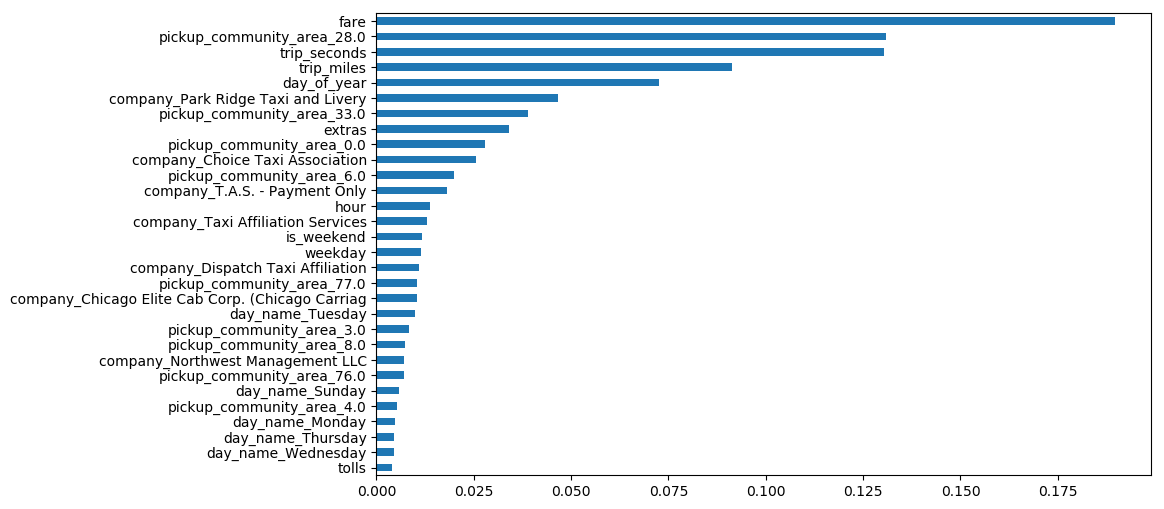

In [23]:
plt.rcdefaults()

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(30).plot(kind='barh', figsize=(10,6)).invert_yaxis() 

# Check effect of changes in most important features

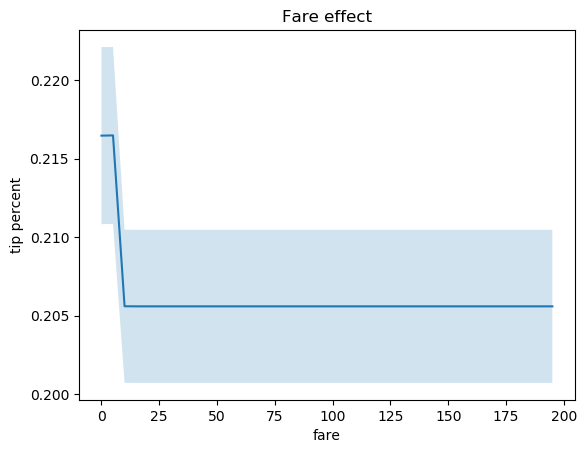

In [24]:
means, stds = [], []
arr = range(0, 200, 5)
for i in arr:
    X_temp = X_valid.copy()
    X_temp.fare = i
    preds = model.predict(X_temp)
    means.append(preds.mean())
    stds.append(preds.std())

plt.title("Fare effect")
plt.xlabel("fare")
plt.ylabel("tip percent")
plt.plot(arr, means)
means = np.array(means)
stds = np.array(stds)
plt.fill_between(arr, means-stds, means+stds, alpha=0.2)
plt.show()

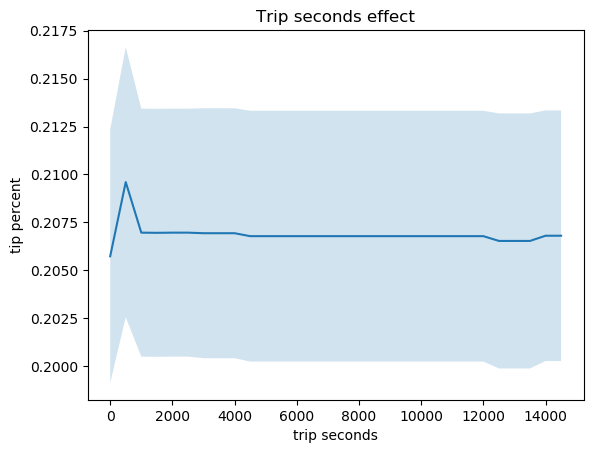

In [25]:
means, stds = [], []
arr = range(0, 15000, 500)
for i in arr:
    X_temp = X_valid.copy()
    X_temp.trip_seconds = i
    preds = model.predict(X_temp)
    means.append(preds.mean())
    stds.append(preds.std())

plt.title("Trip seconds effect")
plt.xlabel("trip seconds")
plt.ylabel("tip percent")
plt.plot(arr, means);
means = np.array(means)
stds = np.array(stds)
plt.fill_between(arr, means-stds, means+stds, alpha=0.2)
plt.show()

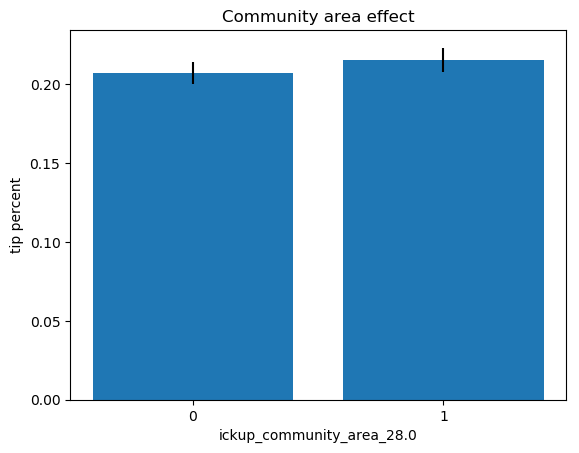

In [26]:
means, stds = [], []
arr = [True, False]
for i in arr:
    X_temp = X_valid.copy()
    X_temp['pickup_community_area_28.0'] = i
    preds = model.predict(X_temp)
    means.append(preds.mean())
    stds.append(preds.std())

plt.title("Community area effect")
plt.xlabel("ickup_community_area_28.0")
plt.ylabel("tip percent")
plt.xticks(arr)
plt.bar(arr, means, yerr=stds);

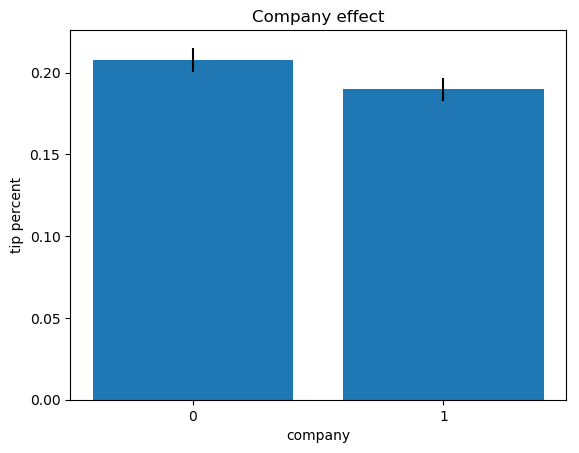

In [27]:
means, stds = [], []
arr = [True, False]
for i in arr:
    X_temp = X_valid.copy()
    X_temp['company_Park Ridge Taxi and Livery'] = i
    preds = model.predict(X_temp)
    means.append(preds.mean())
    stds.append(preds.std())

plt.title("Company effect")
plt.xlabel("company")
plt.ylabel("tip percent")
plt.xticks(arr)
plt.bar(arr, means, yerr=stds);

This plot may be a bit more interesting, probably the comapany 'Park Ridge Taxi and Livery' is bit worse than the others

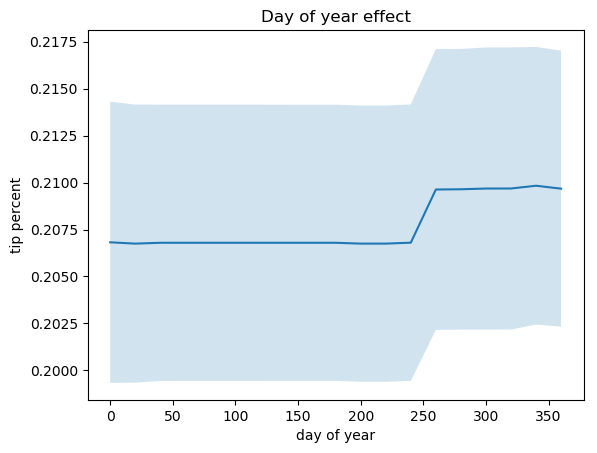

In [28]:
means, stds = [], []
arr = range(0, 365, 20)
for i in arr:
    X_temp = X_valid.copy()
    X_temp.day_of_year = i
    preds = model.predict(X_temp)
    means.append(preds.mean())
    stds.append(preds.std())

plt.title("Day of year effect")
plt.xlabel("day of year")
plt.ylabel("tip percent")
plt.plot(arr, means);
means = np.array(means)
stds = np.array(stds)
plt.fill_between(arr, means-stds, means+stds, alpha=0.2)
plt.show()

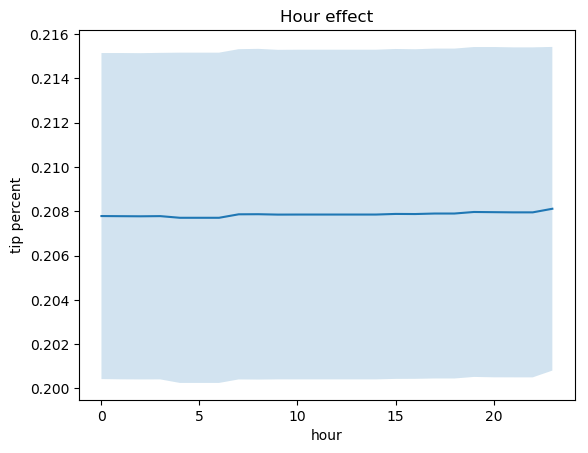

In [29]:
means, stds = [], []
arr = range(0, 24)
for i in arr:
    X_temp = X_valid.copy()
    X_temp.hour = i
    preds = model.predict(X_temp)
    means.append(preds.mean())
    stds.append(preds.std())

plt.title("Hour effect")
plt.xlabel("hour")
plt.ylabel("tip percent")
plt.plot(arr, means);
means = np.array(means)
stds = np.array(stds)
plt.fill_between(arr, means-stds, means+stds, alpha=0.2)
plt.show()

At night tips are higher

# Conclusion
Created model is not so interesting, conclusions from the feature importances should be validated on original dataset not only by changing input variables. Feature importance scores just tell us where to search for interesting plots.